Matplotlib tutorial - Anscombe quartet
by Giancarlo Ruffo

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [5]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
# verify the stats
pairs = (x1, y1), (x1, y2), (x1, y3), (x4, y4)
for x, y in pairs:
  corr, _ = pearsonr(x, y)
  print('mean x=%1.2f, std x=%1.2f, mean y=%1.2f, std y=%1.2f, r=%1.3f' % (np.mean(x), np.std(x), np.mean(y), np.std(y), corr))
  x = np.array(x).reshape((-1, 1))
  y = np.array(y)
  model = LinearRegression().fit(x, y)
  r_sq = model.score(x, y)
  print('coefficient of determination: %1.3f, intercept: %1.3f, slope: %1.3f' % (r_sq, model.intercept_, model.coef_))

mean x=9.00, std x=3.16, mean y=7.50, std y=1.94, r=0.816
coefficient of determination: 0.667, intercept: 3.000, slope: 0.500
mean x=9.00, std x=3.16, mean y=7.50, std y=1.94, r=0.816
coefficient of determination: 0.666, intercept: 3.001, slope: 0.500
mean x=9.00, std x=3.16, mean y=7.50, std y=1.94, r=0.816
coefficient of determination: 0.666, intercept: 3.002, slope: 0.500
mean x=9.00, std x=3.16, mean y=7.50, std y=1.94, r=0.817
coefficient of determination: 0.667, intercept: 3.002, slope: 0.500


In [0]:
def fit(x, intercept, slope):
  return intercept + slope * x

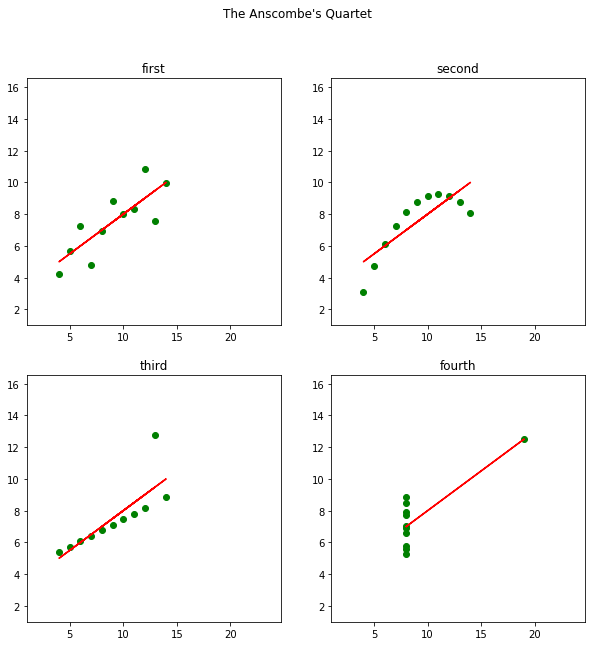

In [25]:
_s = model.coef_[0]
_i = model.intercept_

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

x = np.array(x1)
ax[0,0].plot(x1,y1,"go", x, fit(x, _i, _s), "r-")
ax[0,0].set_title("first")
ax[0,0].set_xlim(1,max(x4)*1.3)
ax[0,0].set_ylim(1,max(y3)*1.3)

ax[0,1].plot(x1, y2, "go", x, fit(x, _i, _s), "r-")
ax[0,1].set_title("second")
ax[0,1].set_xlim(1,max(x4)*1.3)
ax[0,1].set_ylim(1,max(y3)*1.3)


ax[1,0].plot(x1,y3,"go", x, fit(x, _i, _s), "r-")
ax[1,0].set_title("third")
ax[1,0].set_xlim(1,max(x4)*1.3)
ax[1,0].set_ylim(1,max(y3)*1.3)

x = np.array(x4)
ax[1,1].plot(x4, y4, "go", x, fit(x, _i, _s), "r-")
ax[1,1].set_title("fourth")
ax[1,1].set_xlim(1,max(x4)*1.3)
ax[1,1].set_ylim(1,max(y3)*1.3)


plt.suptitle("The Anscombe's Quartet")

plt.show()